In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random
import itertools


In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/My Drive/SNA/roadNet-TX.txt"


In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'roadNet-TX.txt'],
 ['#', 'Texas', 'road', 'network'],
 ['#', 'Nodes:', '1379917', 'Edges:', '3843320'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['0', '1'],
 ['0', '2'],
 ['0', '29'],
 ['1', '0'],
 ['1', '23'],
 ['1', '32'],
 ['2', '0'],
 ['2', '26'],
 ['2', '34'],
 ['29', '0'],
 ['29', '337'],
 ['29', '358'],
 ['23', '1'],
 ['23', '13'],
 ['23', '24'],
 ['32', '1'],
 ['26', '2'],
 ['26', '33'],
 ['34', '2'],
 ['34', '33'],
 ['34', '53'],
 ['3', '4'],
 ['3', '7'],
 ['3', '40'],
 ['4', '3'],
 ['4', '18'],
 ['4', '19'],
 ['7', '3'],
 ['7', '5'],
 ['7', '16'],
 ['7', '17'],
 ['40', '3'],
 ['40', '16'],
 ['40', '39'],
 ['40', '179'],
 ['18', '4'],
 ['18', '179'],
 ['19', '4'],
 ['19', '6'],
 ['19', '17'],
 ['5', '6'],
 ['5', '7'],
 ['5', '10'],
 ['6', '5'],
 ['6', '11'],
 ['6', '19'],
 ['10', '5'],
 ['10', '8'],
 ['10', '11'],
 ['11', '6'],
 ['11', '9'],
 ['11', '10'],
 ['16',

In [5]:
#taking 1000 random samples from the data
sample = random.sample(res, 1000)
filename=open('data18.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
sample

[['637966', '637965'],
 ['619482', '619483'],
 ['1384856', '1384937'],
 ['893947', '893946'],
 ['1260147', '1260014'],
 ['942452', '942250'],
 ['304844', '304806'],
 ['527517', '527515'],
 ['1296938', '1296584'],
 ['556774', '556772'],
 ['128382', '128399'],
 ['135480', '135473'],
 ['1038358', '1038437'],
 ['1200455', '1200789'],
 ['432466', '432478'],
 ['652539', '652321'],
 ['415770', '413313'],
 ['269862', '269863'],
 ['323924', '323925'],
 ['388965', '386075'],
 ['1313277', '1313278'],
 ['1272694', '1272095'],
 ['406799', '406800'],
 ['1155845', '1156003'],
 ['139727', '139731'],
 ['228539', '228541'],
 ['598165', '597375'],
 ['210573', '210574'],
 ['883611', '883605'],
 ['1040470', '1040469'],
 ['330851', '324487'],
 ['1180188', '1180186'],
 ['483352', '483388'],
 ['892470', '892471'],
 ['399696', '399730'],
 ['804994', '804998'],
 ['419980', '419445'],
 ['286262', '286263'],
 ['555812', '555811'],
 ['1032033', '1032013'],
 ['919207', '907408'],
 ['510091', '510108'],
 ['678103', 

In [7]:
G1=nx.read_edgelist('data18.txt',nodetype=int,create_using=nx.DiGraph())
G2=nx.read_edgelist(path,nodetype=int,create_using=nx.DiGraph())
print(nx.info(G1))


Name: 
Type: DiGraph
Number of nodes: 1138
Number of edges: 569
Average in degree:   0.5000
Average out degree:   0.5000


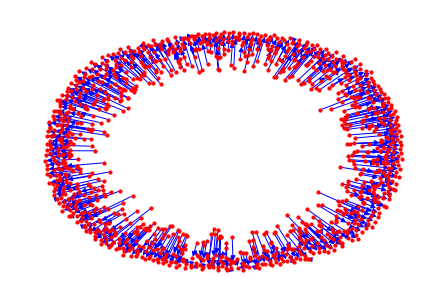

In [8]:
nx.draw(G1, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

###Giant Component

In [9]:
strongly_connected_comp = nx.strongly_connected_components(G2)
Graph1 = max(strongly_connected_comp, key = len)
N = len(G2)


In [10]:
Ng = len(Graph1)

In [11]:
Ng

1351137

In [12]:
Ng/N

0.9791436731339639

###Girvan Newman Algorithm

In [13]:
def girvan_newman(G, most_valuable_edge=None):
# If the graph is already empty, then its connected components will be returned
  if G.number_of_edges() == 0:
    yield tuple(nx.connected_components(G))
    return
    #Use edge betweeness centrality if no function is given for computing most valuable edge
  if most_valuable_edge is None:
    def most_valuable_edge(G):
      betweenness = nx.edge_betweenness_centrality(G)
      return max(betweenness, key=betweenness.get)
  # The copy of G here must include the edge weight data.
  g = G.copy().to_undirected()
  g.remove_edges_from(nx.selfloop_edges(g))
  
  while g.number_of_edges() > 0:
    yield _without_most_central_edges(g, most_valuable_edge)



In [14]:
def _without_most_central_edges(G, most_valuable_edge):
  number_connected = nx.number_connected_components(G)
  new_comp = number_connected
  while new_comp <= number_connected:
    mvedge = most_valuable_edge(G)
    G.remove_edge(*mvedge)
    print("THE REMOVED EDGES ARE : ",end="")
    print(*mvedge)
    new_components = tuple(nx.connected_components(G))
    new_comp = len(new_components)
    return new_components


In [15]:
component_girvan = girvan_newman(G1)

In [16]:
print("Step 1:")
step1 = next(component_girvan)
for i in range(50):
  print(step1[i],end="")

Step 1:
THE REMOVED EDGES ARE : 637966 637965
{637966}{637965}{619482, 619483}{1384856, 1384937}{893946, 893947}{1260147, 1260014}{942250, 942452}{304844, 304806}{527515, 527517}{1296584, 1296938}{556772, 556774}{128382, 128399}{135480, 135473}{1038437, 1038358}{1200789, 1200455}{432466, 432478}{652321, 652539}{413313, 415770}{269862, 269863}{323924, 323925}{386075, 388965}{1313277, 1313278}{1272694, 1272095}{406800, 406799}{1156003, 1155845}{139731, 139727}{228539, 228541}{598165, 597375}{210573, 210574}{883611, 883605}{1040469, 1040470}{330851, 324487}{1180186, 1180188}{483352, 483388}{892470, 892471}{399696, 399730}{804994, 804998}{419980, 419445}{286262, 286263}{555811, 555812}{1032033, 1032013}{907408, 919207}{510091, 510108}{678111, 678103}{614274, 616037}{177064, 173019}{158722, 159397}{279552, 279554}{921281, 921279}{376569, 383509}

In [17]:
print("Number of Communities in Step 1 are: " + str(len(step1)))


Number of Communities in Step 1 are: 570


In [18]:
print("Step 2:")
step2 = next(component_girvan)
print("Number of Communities in Step 2 are: " + str(len(step2)))

Step 2:
THE REMOVED EDGES ARE : 619482 619483
Number of Communities in Step 2 are: 571


In [19]:
step2

({637966},
 {637965},
 {619482},
 {619483},
 {1384856, 1384937},
 {893946, 893947},
 {1260014, 1260147},
 {942250, 942452},
 {304806, 304844},
 {527515, 527517},
 {1296584, 1296938},
 {556772, 556774},
 {128382, 128399},
 {135473, 135480},
 {1038358, 1038437},
 {1200455, 1200789},
 {432466, 432478},
 {652321, 652539},
 {413313, 415770},
 {269862, 269863},
 {323924, 323925},
 {386075, 388965},
 {1313277, 1313278},
 {1272095, 1272694},
 {406799, 406800},
 {1155845, 1156003},
 {139727, 139731},
 {228539, 228541},
 {597375, 598165},
 {210573, 210574},
 {883605, 883611},
 {1040469, 1040470},
 {324487, 330851},
 {1180186, 1180188},
 {483352, 483388},
 {892470, 892471},
 {399696, 399730},
 {804994, 804998},
 {419445, 419980},
 {286262, 286263},
 {555811, 555812},
 {1032013, 1032033},
 {907408, 919207},
 {510091, 510108},
 {678103, 678111},
 {614274, 616037},
 {173019, 177064},
 {158722, 159397},
 {279552, 279554},
 {921279, 921281},
 {376569, 383509},
 {1188905, 1189101},
 {1215046, 1215065},

In [20]:
print("Step 3:")
step3 = next(component_girvan)
print("Number of Communities in Step 3 are: " + str(len(step3)))

Step 3:
THE REMOVED EDGES ARE : 1384856 1384937
Number of Communities in Step 3 are: 572


In [21]:
step3

({637966},
 {637965},
 {619482},
 {619483},
 {1384856},
 {1384937},
 {893946, 893947},
 {1260014, 1260147},
 {942250, 942452},
 {304806, 304844},
 {527515, 527517},
 {1296584, 1296938},
 {556772, 556774},
 {128382, 128399},
 {135473, 135480},
 {1038358, 1038437},
 {1200455, 1200789},
 {432466, 432478},
 {652321, 652539},
 {413313, 415770},
 {269862, 269863},
 {323924, 323925},
 {386075, 388965},
 {1313277, 1313278},
 {1272095, 1272694},
 {406799, 406800},
 {1155845, 1156003},
 {139727, 139731},
 {228539, 228541},
 {597375, 598165},
 {210573, 210574},
 {883605, 883611},
 {1040469, 1040470},
 {324487, 330851},
 {1180186, 1180188},
 {483352, 483388},
 {892470, 892471},
 {399696, 399730},
 {804994, 804998},
 {419445, 419980},
 {286262, 286263},
 {555811, 555812},
 {1032013, 1032033},
 {907408, 919207},
 {510091, 510108},
 {678103, 678111},
 {614274, 616037},
 {173019, 177064},
 {158722, 159397},
 {279552, 279554},
 {921279, 921281},
 {376569, 383509},
 {1188905, 1189101},
 {1215046, 121506

In [22]:
print("Step 4:")
step4 = next(component_girvan)
print("Number of Communities in Step 4 are: " + str(len(step4)))

Step 4:
THE REMOVED EDGES ARE : 893947 893946
Number of Communities in Step 4 are: 573


In [23]:
step4


({637966},
 {637965},
 {619482},
 {619483},
 {1384856},
 {1384937},
 {893947},
 {893946},
 {1260014, 1260147},
 {942250, 942452},
 {304806, 304844},
 {527515, 527517},
 {1296584, 1296938},
 {556772, 556774},
 {128382, 128399},
 {135473, 135480},
 {1038358, 1038437},
 {1200455, 1200789},
 {432466, 432478},
 {652321, 652539},
 {413313, 415770},
 {269862, 269863},
 {323924, 323925},
 {386075, 388965},
 {1313277, 1313278},
 {1272095, 1272694},
 {406799, 406800},
 {1155845, 1156003},
 {139727, 139731},
 {228539, 228541},
 {597375, 598165},
 {210573, 210574},
 {883605, 883611},
 {1040469, 1040470},
 {324487, 330851},
 {1180186, 1180188},
 {483352, 483388},
 {892470, 892471},
 {399696, 399730},
 {804994, 804998},
 {419445, 419980},
 {286262, 286263},
 {555811, 555812},
 {1032013, 1032033},
 {907408, 919207},
 {510091, 510108},
 {678103, 678111},
 {614274, 616037},
 {173019, 177064},
 {158722, 159397},
 {279552, 279554},
 {921279, 921281},
 {376569, 383509},
 {1188905, 1189101},
 {1215046, 121

In [24]:
print("Step 5:")
step5 = next(component_girvan)
print("Number of Communities in Step 5 are: " + str(len(step5)))

Step 5:
THE REMOVED EDGES ARE : 1260147 1260014
Number of Communities in Step 5 are: 574


In [25]:
step5

({637966},
 {637965},
 {619482},
 {619483},
 {1384856},
 {1384937},
 {893947},
 {893946},
 {1260147},
 {1260014},
 {942250, 942452},
 {304806, 304844},
 {527515, 527517},
 {1296584, 1296938},
 {556772, 556774},
 {128382, 128399},
 {135473, 135480},
 {1038358, 1038437},
 {1200455, 1200789},
 {432466, 432478},
 {652321, 652539},
 {413313, 415770},
 {269862, 269863},
 {323924, 323925},
 {386075, 388965},
 {1313277, 1313278},
 {1272095, 1272694},
 {406799, 406800},
 {1155845, 1156003},
 {139727, 139731},
 {228539, 228541},
 {597375, 598165},
 {210573, 210574},
 {883605, 883611},
 {1040469, 1040470},
 {324487, 330851},
 {1180186, 1180188},
 {483352, 483388},
 {892470, 892471},
 {399696, 399730},
 {804994, 804998},
 {419445, 419980},
 {286262, 286263},
 {555811, 555812},
 {1032013, 1032033},
 {907408, 919207},
 {510091, 510108},
 {678103, 678111},
 {614274, 616037},
 {173019, 177064},
 {158722, 159397},
 {279552, 279554},
 {921279, 921281},
 {376569, 383509},
 {1188905, 1189101},
 {1215046, 

###Ravasz Algorithm

In [26]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict

In [27]:
Gu=G1.to_undirected()

In [28]:
def create_hc(G, t):
    labels=list(G.nodes())    #node labels
    path_length=[n for n in nx.all_pairs_shortest_path_length(Gu)]
    #the distance matrix D
    dist_mat=np.zeros((len(G),len(G))) 
    G1_list=list(G.nodes())   
    for u,p in path_length:
        for v,dis in p.items():
            dist_mat[G1_list.index(u)][G1_list.index(v)] = dis
            dist_mat[G1_list.index(v)][G1_list.index(u)] = dis
            if u==v:
                dist_mat[G1_list.index(u)][G1_list.index(u)]=0

    # Creating hierarchical cluster (HC)
    # Creating the HCs using the complete/max/farthest point linkage 
    Y = distance.squareform(dist_mat) ## the upper triangular of the distance matrix 
    Z = hierarchy.average(Y)
    
    #For illustrive purposes, partition selection (t) is arbitrary
    membership=list(hierarchy.fcluster(Z,t=t))
    # Creating collection of lists for blockmodel
    part = defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        part[p].append(labels[n])
        
    return Z, membership, part

In [29]:
Z, membership, part = create_hc(Gu, t=1.5) 
part.items()

dict_items([(1, [637966, 637965, 619482, 619483, 1384856, 1384937, 893947, 893946, 1260147, 1260014, 942452, 942250, 304844, 304806, 527517, 527515, 1296938, 1296584, 556774, 556772, 128382, 128399, 135480, 135473, 1038358, 1038437, 1200455, 1200789, 432466, 432478, 652539, 652321, 415770, 413313, 269862, 269863, 323924, 323925, 388965, 386075, 1313277, 1313278, 1272694, 1272095, 406799, 406800, 1155845, 1156003, 139727, 139731, 228539, 228541, 598165, 597375, 210573, 210574, 883611, 883605, 1040470, 1040469, 330851, 324487, 1180188, 1180186, 483352, 483388, 892470, 892471, 399696, 399730, 804994, 804998, 419980, 419445, 286262, 286263, 555812, 555811, 1032033, 1032013, 919207, 907408, 510091, 510108, 678103, 678111, 616037, 614274, 177064, 173019, 159397, 158722, 279552, 279554, 921281, 921279, 383509, 376569, 1188905, 1189101, 1215046, 1215065, 678075, 678059, 1253279, 1251288, 799922, 795748, 1288976, 1280552, 264615, 264717, 447175, 447170, 652667, 652657, 1328563, 1328571, 958878,

In [30]:
part = {}
i = 0
for i in range(len(membership)):
    part[i]=membership[i]

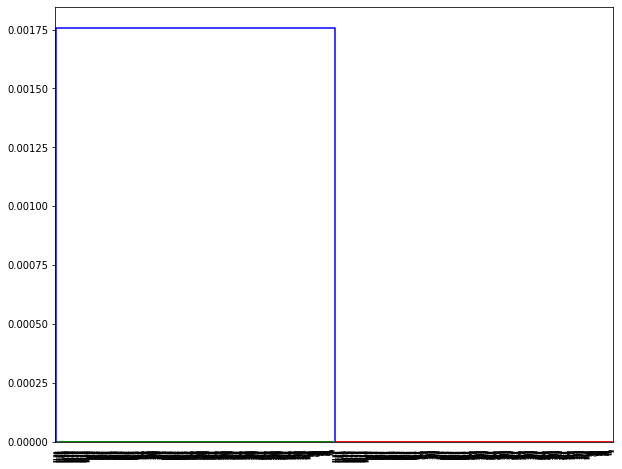

In [31]:
plt.figure(figsize=(10,8))
hierarchy.dendrogram(Z)
plt.show()